# **Sales Data Analysis Project for a Medical Supplies Company**

This project focuses on analyzing sales data to derive insights about product performance, customer behavior, and relationships between products, ultimately leading to the development of a recommender system for a medical supplies company. The analysis is conducted through several stages, employing data preprocessing, aggregation, and distance computation methods to identify trends and correlations. Additionally, we will:

- **Utilize Cosine Similarity for Product Descriptions**
- **Build a Popularity-Based Recommender System**
- **Implement a Recommender System using Matrix Factorization**

<div style="text-align: center;">
    <img src="https://americanceliac.org/wp-content/uploads/2022/04/supplay-768x403.jpg" alt="Medical Supplies">
</div>

### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import re
import nltk 
nltk.download('punkt','stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to stopwords...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Importing the data

In [2]:
df = pd.read_csv('PBL 5 recommendation data.csv', encoding='ISO-8859-1',low_memory=False)

### EDA - Exploratoy Data Analysis 

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN
4193,3736,Michael,Kiernan,NaN,1463418049,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,Large,NaN,NaN,NaN,NaN,PF03816,3.0,NaN


In [7]:
df.shape

(4194, 181)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [5]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [6]:
df.dtypes

Customers.id               int64
Customers.fname           object
Customers.lname           object
Customers.company         object
Customers.create_date      int64
                          ...   
Products.leg_style       float64
Products.seat_size        object
Products.family_id        object
Products.saved_status    float64
Products.freight_cost    float64
Length: 181, dtype: object

### Utilizing Cosine Similarity for Product Descriptions

In [9]:
#selecting the relevant columns from the dataframe
df=df[['Products.id','Order_Items.product_name','Products.short_description','Orders.total']]

In [10]:
df.sample(8)

,Products.id,Order_Items.product_name,Products.short_description,Orders.total
2752,11516.0,Disposable Knit Cuff / Knit Collar Multi-Layer...,"COAT,LAB,MLTILYR,KNT CF/COLLAR,WHT,MD",73.56
4116,14298.0,The Original Cuff&reg; Ankle and Wrist Weight ...,NaN,38.83
1878,984.0,Guardian Walker Platform Attachment,"ATTACHMENT,PLATFORM,WALKER",51.84
2116,929.0,"Basic Knee Walker, White","KNEE WALKER,BASIC,300LB WEIGHT CAP",151.78
3203,NaN,SPDELR-TF,NaN,54.95
3760,1842.0,"Medline Emesis/Barf Bags, throw up bags, Blue ...","BAG,EMESIS,SICKNESS CLEAN-UP,CLEAN SACK",14.85
3936,111.0,"CURAD Cast Protectors, Adult","PROTECTOR CAST,CURAD,ADULT LEG,2/BX",230.94
1968,3312.0,Walker Basket,NaN,24.90


In [11]:
df.isnull().sum()

Products.id                    157
Order_Items.product_name         0
Products.short_description    1179
Orders.total                     0
dtype: int64

In [12]:
#dropping the rows where 'Products.short_description' is missing
df=df.dropna(subset=['Products.short_description'],how='any')

In [13]:
#reseting the index of the DataFrame
df=df.reset_index(drop=True)

In [14]:
#text cleaning
df['Products.short_description']=df['Products.short_description'].str.lower()
df['Products.short_description']=df['Products.short_description'].str.replace(r'[^\w\s]','',regex=True)
df['Products.short_description']=df['Products.short_description'].str.replace(r'\d+','',regex=True)
df['Products.short_description']=df['Products.short_description'].str.replace('\n','',regex=True)
df['Products.short_description']=df['Products.short_description'].str.replace('\r','',regex=True)

In [15]:
#tokenization and stopword removal
filtered_texts = [] #initializing a list to hold filtered texts

for description in df ['Products.short_description']:
    tokens = word_tokenize (description)
    stop_words = set (stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    filtered_text = ' '.join(filtered_tokens)
    filtered_texts.append(filtered_text)

df ['filtered_description'] = filtered_texts #adding a new column to the DataFrame with the cleaned text

In [16]:
df['filtered_description'][150]

'wheelchairkbasicdlasa footrest'

In [17]:
#TF-IDF vectorization
tfidf_vect = TfidfVectorizer(stop_words='english' )
tfidf_matrix = tfidf_vect. fit_transform(df["filtered_description"])

In [18]:
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix) #creating a sparse dataframe from the TF-IDF matrix

In [19]:
tfidf_df.shape

(3015, 1456)

In [20]:
#combining dataframes
df = pd.concat([df, tfidf_df], axis=1)

In [21]:
df.sample(7)

,Products.id,Order_Items.product_name,Products.short_description,Orders.total,filtered_description,0,1,2,3,4,...,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455
904,776.0,Medline Elite Automatic Digital Blood Pressure...,monitorbpautodigitaladult,952.18,monitorbpautodigitaladult,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1274.0,ReadyBath SELECT Medium Weight Cleansing Washc...,readybath select scented pk,132.17,readybath select scented pk,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1015.0,Transfer Bench with Back,benchtransferbackpush buttons,62.10,benchtransferbackpush buttons,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1625,910.0,Medline Deluxe Aluminum Transport Chair With H...,transport chairalum basicwhlblue,129.99,transport chairalum basicwhlblue,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1938,853.0,Medline Excel Hybrid 2 in 1 Combination Wheelc...,wheelchairhybridremov dl arms,296.77,wheelchairhybridremov dl arms,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1346,1554.0,"Medigrip Tubular Bandages , Size F , 4"" Wide",bandagetubularelstmedigripsize f,106.63,bandagetubularelstmedigripsize f,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
791,1947.0,"Sling Style Shoulder Immobilizers, X-Large",immobilizershoulderslingxlea,86.63,immobilizershoulderslingxlea,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#building product dictionary
product_dict = {} 
for index, row in df. iterrows():
    product_id = row['Products.id']
    name = row[ 'Order_Items.product_name']
    description = row.iloc[6:1616].tolist()
    # Check the data type of Orders. total
    if isinstance(row[ 'Orders.total'], dict):
        size = row['Orders.total'].get('size', None)
        mean= row['Orders.total'].get ('mean', None)
    elif isinstance(row['Orders.total'], (int, float)):
        size = row[ 'Orders.total']
        mean = row['Orders.total']
    else:
        size = None
        mean = None
    product_dict [product_id] = [name, description, size, mean]

In [23]:
#function to compute the cosine distance between two products
def compute_distance(a, b):
    if isinstance(a [1], np.ndarray) and isinstance(b[1], np.ndarray):
        description_distance = spatial.distance.cosine(a[1], b[1])
    else:
        try:
            description_distance = spatial.distance.cosine(np.array(a[1]), np.array(b[1]))
        except (ValueError, TypeError):
            description_distance = 0
    popularity_distance = abs(a [2] - b[2]) # based on number of orders
    
    return description_distance + popularity_distance

In [24]:
compute_distance(product_dict[551],product_dict[321])

78.94

In [25]:
#calculating the distances for selected products
product_ids = [1629.0, 251.0, 911.0, 910.0, 1867.0, 385.0, 1862.0, 1469.0, 2109.0, 837.0]
distances = []
for i in range(len(product_ids)): #first loop iterates through the list of product ids 
    for j in range(i+1, len(product_ids)): #second loop gets every id of that list
        product_a = product_dict [product_ids [i]]
        product_b = product_dict [product_ids [j]]
        distance = compute_distance(product_a, product_b)
        distances.append((product_ids [i], product_ids[j], distance))

In [26]:
distances.sort (key=lambda x: x [2])
best_matches = distances [:10]
for product_id_a, product_id_b, distance in best_matches:
    print(f"product {product_id_a} and Product {product_id_b} have a distance of {distance: .2f}")

product 1867.0 and Product 1862.0 have a distance of  1.00
product 911.0 and Product 1867.0 have a distance of  1.81
product 911.0 and Product 1862.0 have a distance of  1.81
product 1629.0 and Product 251.0 have a distance of  4.15
product 911.0 and Product 837.0 have a distance of  6.46
product 1867.0 and Product 837.0 have a distance of  7.27
product 1862.0 and Product 837.0 have a distance of  7.27
product 385.0 and Product 1469.0 have a distance of  8.62
product 910.0 and Product 837.0 have a distance of  11.74
product 911.0 and Product 910.0 have a distance of  16.70


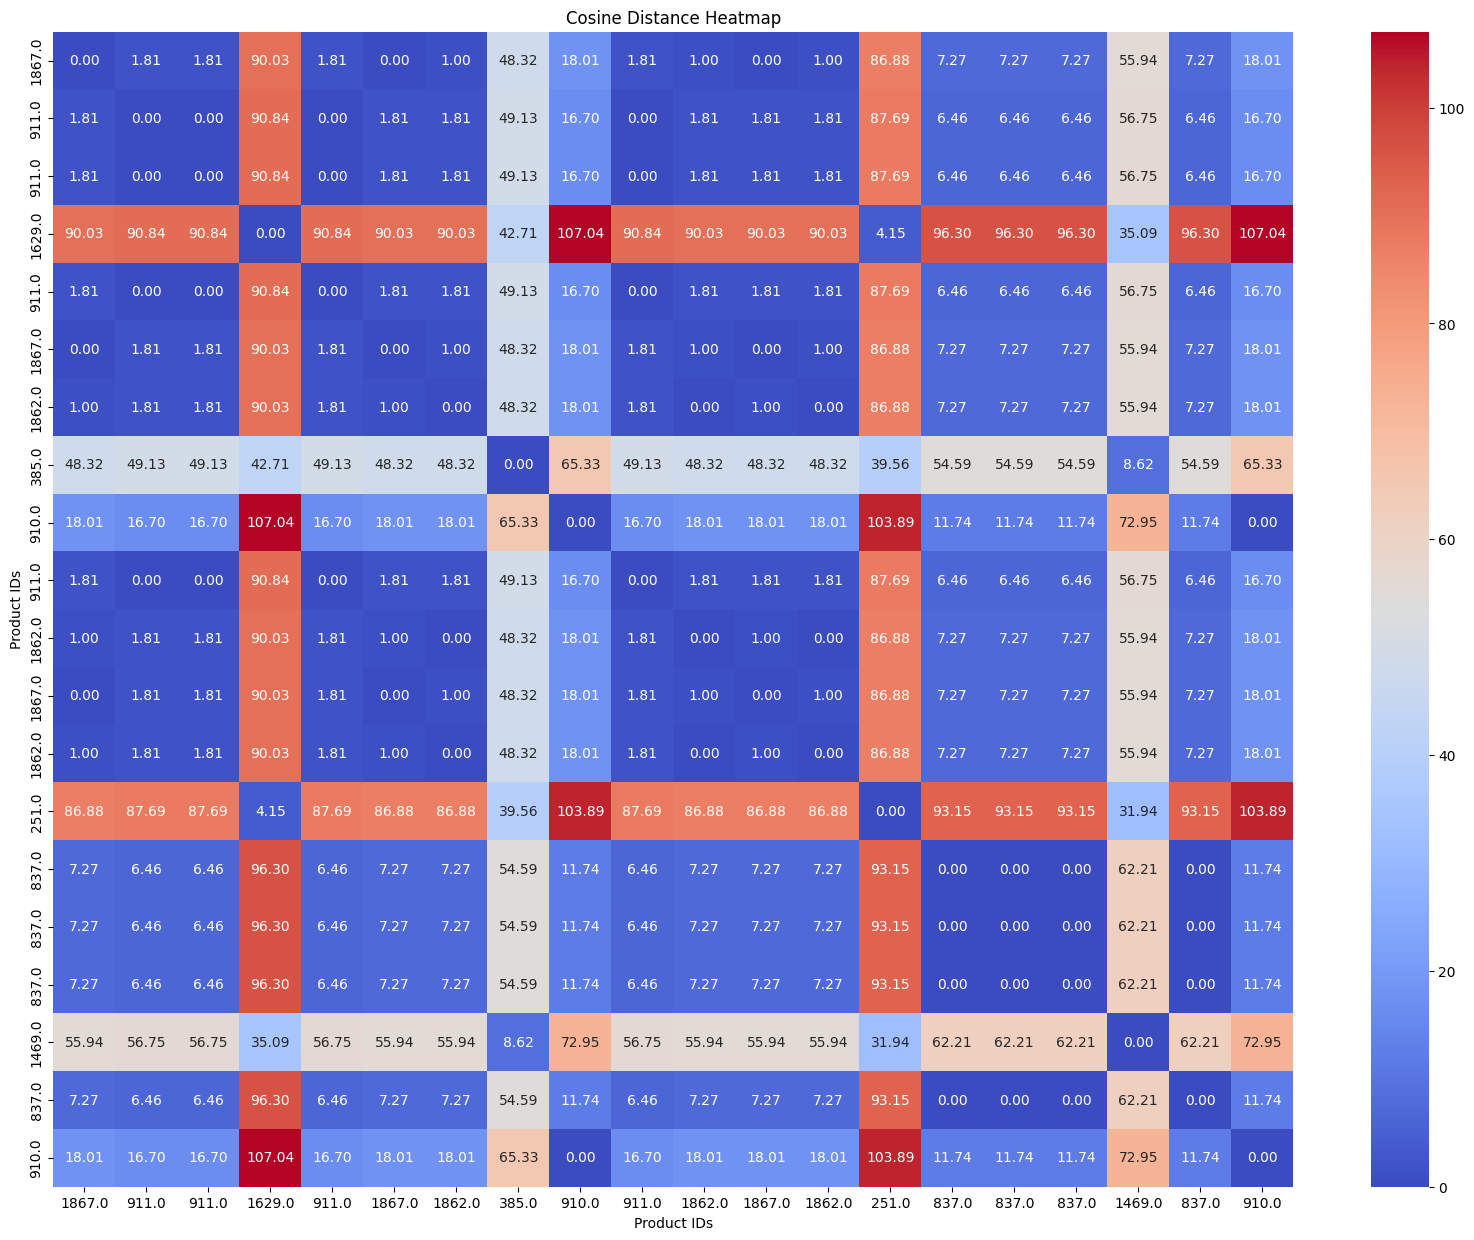

In [27]:
#heatmap
best_match_ids = [match[0] for match in best_matches] + [match[1] for match in best_matches]
distance_matrix = np.zeros((len(best_match_ids), len(best_match_ids)))

for i, product_id_a in enumerate(best_match_ids):
    for j, product_id_b in enumerate(best_match_ids):
        if i != j:
            product_a = product_dict[product_id_a]
            product_b = product_dict[product_id_b]
            distance_matrix[i, j] = compute_distance(product_a, product_b)

plt.figure(figsize=(20, 15))
sns.heatmap(distance_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=best_match_ids, yticklabels=best_match_ids)
plt.title('Cosine Distance Heatmap')
plt.xlabel('Product IDs')
plt.ylabel('Product IDs')
plt.show()

### Building a Popularity-Based Recommender System

In [28]:
#loading the dataset and selecting the relevant columns
df = pd.read_csv('PBL 5 recommendation data.csv', encoding='ISO-8859-1',low_memory=False)
df=df[['Orders.customer_id','Order_Items.product_name','Order_Items.product_id','Order_Items.qty','Order_Items.price','Orders.total']]

In [29]:
df.head()

,Orders.customer_id,Order_Items.product_name,Order_Items.product_id,Order_Items.qty,Order_Items.price,Orders.total
0,797,"Basic Rollators, Green",2310.0,1,57.20,64.29
1,3,"Urinary Drain Bags,0.000",177.0,4,5.00,29.99
2,3,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1.0,1,68.78,78.73
3,4,Basket for 2-Button Walkers,983.0,1,19.56,29.55
4,5,Tens Units,991.0,1,36.05,46.00


In [30]:
#removing rows with missing product ids
df=df.dropna(subset=['Order_Items.product_id'],how='any')

In [31]:
#grouping data by product name
grouped_products= df.groupby('Order_Items.product_name').agg(
    quantity_sold=('Order_Items.qty','sum'),
    total_revenue=('Orders.total','sum'),
    avg_price=('Orders.total','mean'),
    num_orders=('Orders.total','size')
)

In [32]:
grouped_products.head()

,quantity_sold,total_revenue,avg_price,num_orders
Order_Items.product_name,,,,
1 Box Of Medline Commode Liners with Absorbent Pad,2,37.98,37.98,1
1 Pad of CURAD Mediplast Wart Pad,1,14.83,14.83,1
"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large",1,235.05,235.05,1
"1/2"" self-adhesive hook material, 25 yard dispenser box, white",1,55.81,55.81,1
"1/2"" self-adhesive loop material, 25 yard dispenser box, white",1,55.81,55.81,1


In [33]:
#sorting the products by quantity sold
popular_products=grouped_products.sort_values('quantity_sold',ascending=False)

In [34]:
popular_products.head()

,quantity_sold,total_revenue,avg_price,num_orders
Order_Items.product_name,,,,
"Disposable Emergency Blanket, Gray, Not Applicable",305,10470.46,747.890000,14
"2-Ply Tissue/Poly Professional Towels, White, Not Applicable",220,5093.30,2546.650000,2
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size,164,9699.56,183.010566,53
Sanitary Pads with Adhesive & Wings,133,4987.50,2493.750000,2
Corrugated Aerosol Tubing,110,1984.00,152.615385,13


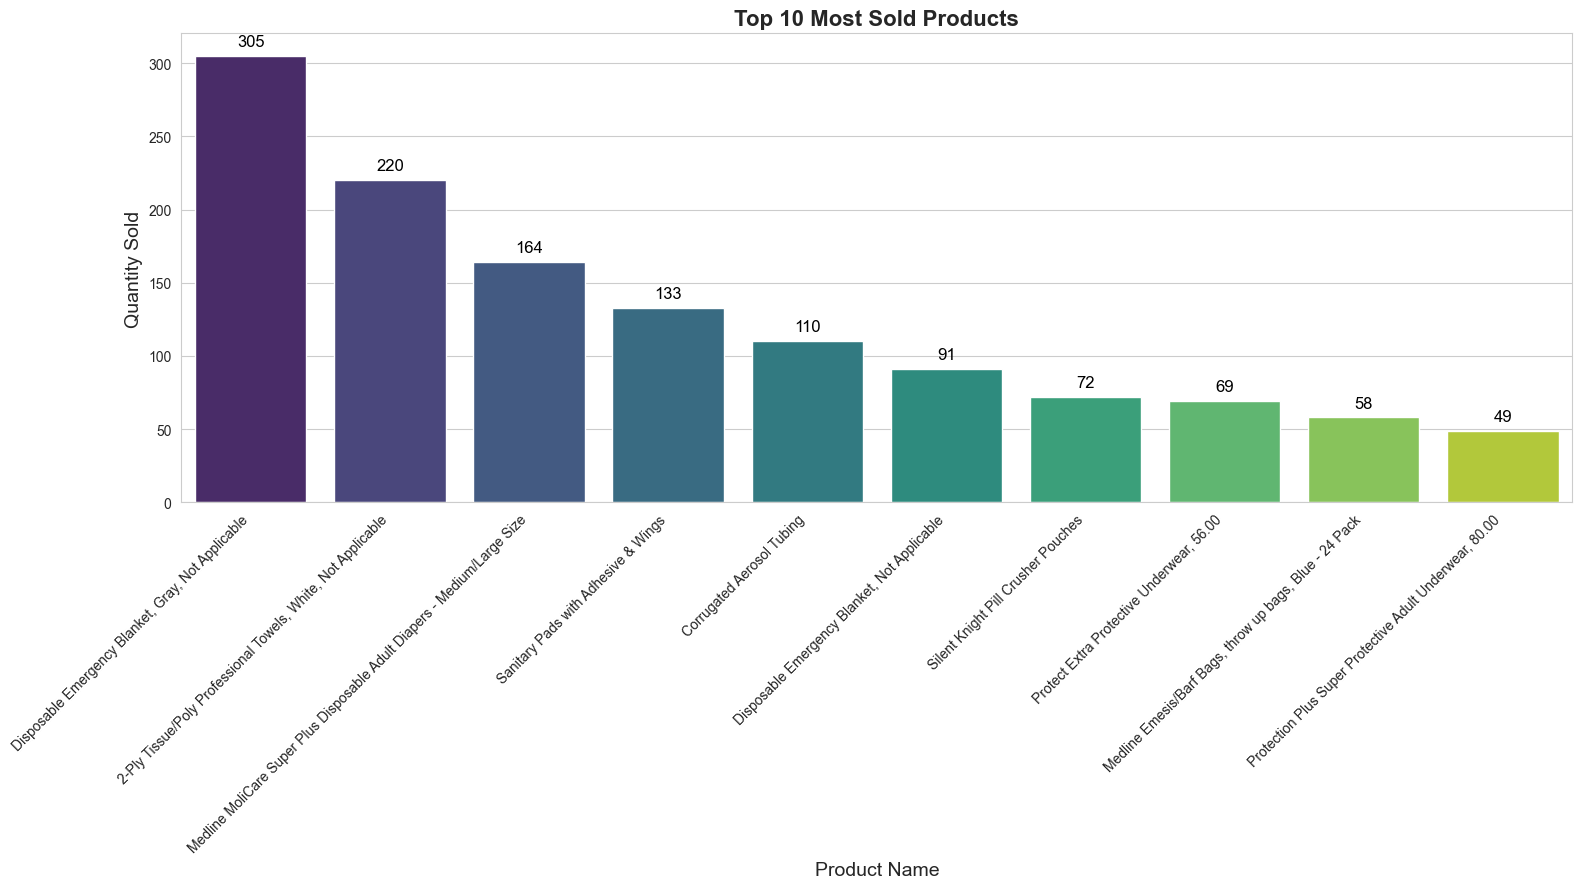

In [35]:
#top 10 most sold products graph
sns.set_style("whitegrid")
plt.figure(figsize=(16, 9))
top_products = popular_products.reset_index().head(10)

palette = sns.color_palette("viridis", n_colors=10)
bar_plot = sns.barplot(x='Order_Items.product_name', y='quantity_sold', data=top_products, palette=palette)

plt.title('Top 10 Most Sold Products', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', 
                      fontsize=12, color='black', xytext=(0, 5),textcoords='offset points')

plt.tight_layout()
plt.show()

In [36]:
rev_cont=grouped_products.sort_values('total_revenue',ascending=False)

In [37]:
rev_cont.head()

,quantity_sold,total_revenue,avg_price,num_orders
Order_Items.product_name,,,,
"Disposable Emergency Blanket, Gray, Not Applicable",305,10470.46,747.890000,14
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size,164,9699.56,183.010566,53
"Medline Deluxe Aluminum Transport Chair With Hand Brakes, Red, Wheels Front 8"" Back 12"", Leightweight Weighs 23 Lbs, Cap. 300 Lbs.",47,6336.43,137.748478,46
Silent Knight Pill Crusher Pouches,72,5223.95,108.832292,48
K1 Basic Extra-Wide Wheelchairs,39,5201.27,144.479722,36


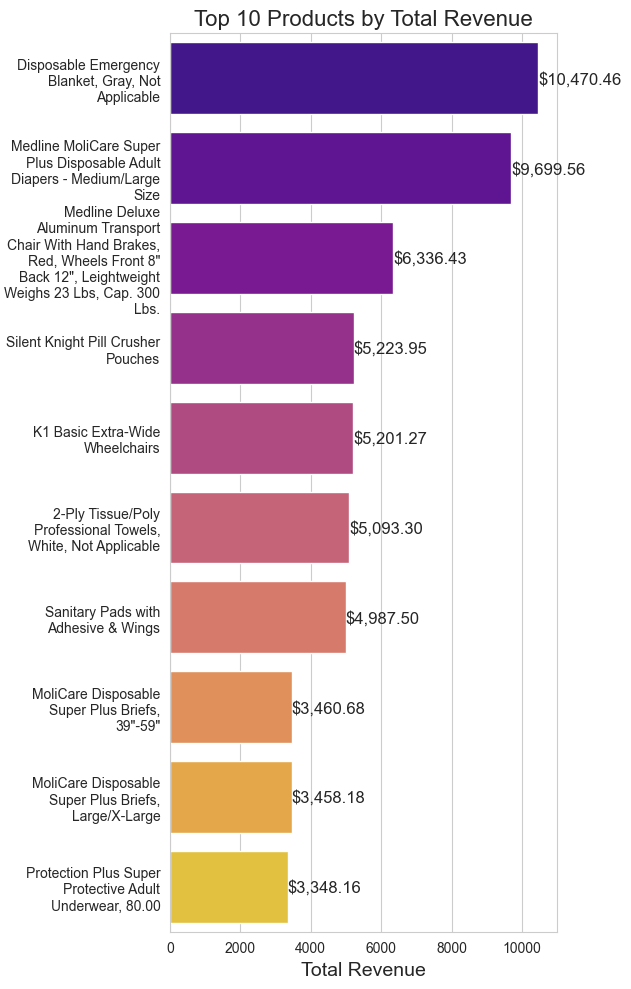

In [38]:
#top 10 products by total revenue graph
sns.set_style("whitegrid")
plt.figure(figsize=(6, 10))

top_revenue_products = rev_cont.reset_index().head(10)
ax = sns.barplot(y='Order_Items.product_name', x='total_revenue', data=top_revenue_products, palette='plasma')
plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.ylabel('Product Name', fontsize=14)
plt.xlabel('Total Revenue', fontsize=14)

for p in ax.patches:
    ax.annotate(f'${p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height()/2.), ha='left', va='center', fontsize=12)

for label in ax.get_yticklabels():
    label.set_wrap(True)

plt.tight_layout()
plt.show()

In [39]:
best_selling=grouped_products.sort_values('num_orders',ascending=False)

In [40]:
best_selling.head()

,quantity_sold,total_revenue,avg_price,num_orders
Order_Items.product_name,,,,
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size,164,9699.56,183.010566,53
Silent Knight Pill Crusher Pouches,72,5223.95,108.832292,48
"Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack",58,941.80,20.038298,47
"Medline Deluxe Aluminum Transport Chair With Hand Brakes, Red, Wheels Front 8"" Back 12"", Leightweight Weighs 23 Lbs, Cap. 300 Lbs.",47,6336.43,137.748478,46
K1 Basic Extra-Wide Wheelchairs,39,5201.27,144.479722,36


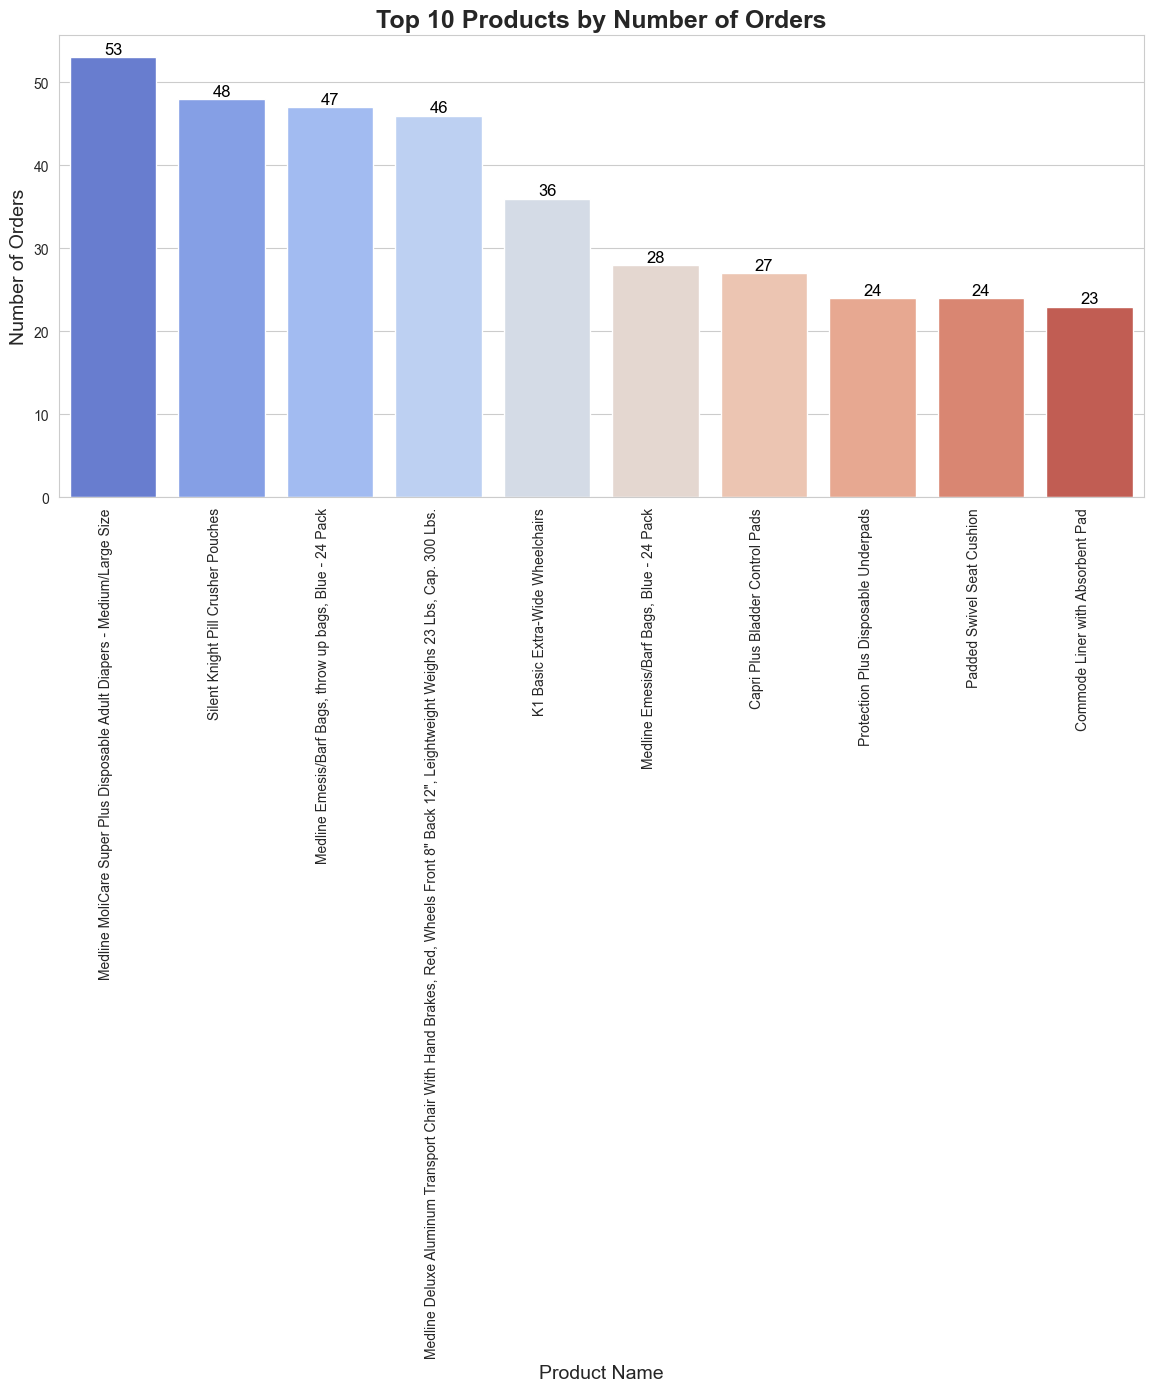

In [41]:
#top 10 products by number of orders graph
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

top_order_products = best_selling.reset_index().head(10)
ax = sns.barplot(x='Order_Items.product_name', y='num_orders', data=top_order_products, palette='coolwarm')
plt.title('Top 10 Products by Number of Orders', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=90, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

### Implementing a Recommender System using Matrix Factorization

In [42]:
#loading the dataset and selecting the relevant columns
df = pd.read_csv('PBL 5 recommendation data.csv', encoding='ISO-8859-1',low_memory=False)
df=df[['Orders.customer_id','Order_Items.product_name','Order_Items.product_id','Orders.total']]

In [43]:
df.head()

,Orders.customer_id,Order_Items.product_name,Order_Items.product_id,Orders.total
0,797,"Basic Rollators, Green",2310.0,64.29
1,3,"Urinary Drain Bags,0.000",177.0,29.99
2,3,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1.0,78.73
3,4,Basket for 2-Button Walkers,983.0,29.55
4,5,Tens Units,991.0,46.00


In [44]:
df.isnull().sum()

Orders.customer_id           0
Order_Items.product_name     0
Order_Items.product_id      43
Orders.total                 0
dtype: int64

In [45]:
df.shape

(4194, 4)

In [46]:
#calculating the total spending per customer and merging total spending back into original dataframe
customer_spending=df.groupby('Orders.customer_id')['Orders.total'].sum().reset_index(name='total')
df=pd.merge(df,customer_spending,on='Orders.customer_id',how='left')

In [47]:
df.head()

,Orders.customer_id,Order_Items.product_name,Order_Items.product_id,Orders.total,total
0,797,"Basic Rollators, Green",2310.0,64.29,64.29
1,3,"Urinary Drain Bags,0.000",177.0,29.99,108.72
2,3,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1.0,78.73,108.72
3,4,Basket for 2-Button Walkers,983.0,29.55,29.55
4,5,Tens Units,991.0,46.00,124.99


In [48]:
#creating a pivot table for product prices
product_prices=df.pivot_table(index='Orders.customer_id',columns='Order_Items.product_name',values='total',fill_value=0)

In [49]:
product_prices.head()

Order_Items.product_name,"BUCKET, REPLACEMENT FOR MDS89668XW",1 Box Of Medline Commode Liners with Absorbent Pad,1 Pad of CURAD Mediplast Wart Pad,"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",10215-s,12112-3,...,"Wrist and Forearm Splints, Medium","Youth Two-Button Folding Walkers with 5"" Wheels, 5""",Youth-Sized Walker Platform Attachment,"Zip-Style Biohazard Specimen Bags, Clear",g222-0913,"iWalker Euro Style Rollator, Red","medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder.",mmm15330zz,"sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","sEMG - single use uni-gel electrodes only, case of 100"
Orders.customer_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#selecting specific products for correlation
pouch=product_prices['Silent Knight Pill Crusher Pouches'] 

In [51]:
pouch.value_counts()

Silent Knight Pill Crusher Pouches
0.00       3007
37.99         8
234.62        3
228.14        3
55.75         2
203.16        2
34.19         2
225.96        1
145.76        1
530.06        1
215.96        1
114.07        1
398.13        1
285.74        1
203.36        1
161.96        1
931.80        1
301.72        1
205.32        1
41.36         1
101.55        1
1172.76       1
122.68        1
75.98         1
225.46        1
193.16        1
392.75        1
453.96        1
21.93         1
41.85         1
548.10        1
288.30        1
1157.47       1
217.96        1
Name: count, dtype: int64

In [52]:
bag=product_prices['Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack']

In [53]:
bag.value_counts()

Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack
0.00      3009
14.85       18
16.23       15
29.70        3
32.46        2
73.81        1
48.69        1
31.08        1
14.61        1
59.40        1
154.98       1
16.06        1
Name: count, dtype: int64

In [54]:
#calculating the correlation between selected products
product_prices[['Silent Knight Pill Crusher Pouches','Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack']].corr()

Order_Items.product_name,Silent Knight Pill Crusher Pouches,"Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack"
Order_Items.product_name,,
Silent Knight Pill Crusher Pouches,1.000000,-0.007252
"Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack",-0.007252,1.000000


In [55]:
#calculating the correlation of all products with the selected product
sim_product = product_prices.corrwith(pouch).sort_values(ascending=False)

In [56]:
sim_product.head()

Order_Items.product_name
Silent Knight Pill Crusher Pouches                             1.000000
Non-Sterile Graduated Plastic Medicine Cups                    0.539383
Medline [LINKS MEDICAL PRODUCTS] Silent Knight Pill Crusher    0.499491
Silent Knight Pill Crushers                                    0.486125
Enteral Feeding and Irrigation Syringes, 60.00                 0.481866
dtype: float64

## **Conclusion**

+ Through this comprehensive analysis, the project successfully provided actionable insights that drive sales strategies, improve customer satisfaction, and optimize inventory management. The recommender systems built using popularity, matrix factorization, and cosine similarity for product descriptions offer tailored recommendations to customers. This leads to increased sales, better customer engagement, and more efficient inventory management.